In [1]:
import os, glob, numpy as np, matplotlib.pyplot as plt, pandas as pd 
from tensorboard.backend.event_processing import event_accumulator 
from collections import defaultdict 

In [2]:
LOG_DIRS = ["./mpe_logs", "./cp_mpe_logs", "./new_cp_mpe_logs", "./cp-reps", "./env-search"] 
LOG_DIRS = ["./mpe_logs", "./cp-reps"] 
LOG_DIRS = ["debug_logs/mpe_logs", "debug_logs/cp-reps-3", "debug_logs/new_cp_mpe_logs", "debug_logs/cp-reps-penultimate"] 
# LOG_DIRS = ["debug_logs/cp-reps", "debug_logs/cp-reps-1", "debug_logs/cp-reps-2", "debug_logs/cp-reps-3"] 

SAVE_NUMPY = False       
SMOOTH = 100 

STORE_EVERYTHING_SIZE_GUIDANCE = {
    'compressedHistograms': 0, 
    'images': 0, 
    'audio': 0, 
    'scalars': 0, 
    'histograms': 0, 
} 

CUT = 30_000     

In [3]:
def get_values(filename, scalar="Episodic_Reward"): 
    ea = event_accumulator.EventAccumulator(filename, size_guidance=STORE_EVERYTHING_SIZE_GUIDANCE)
    ea.Reload()
    print(ea.Tags()) 
    ea_scalar = ea.Scalars(tag=scalar) 
    ea_scalar = pd.DataFrame(ea_scalar) 
    return ea_scalar 

In [4]:
if SAVE_NUMPY: 
    logs = glob.glob(os.path.join(LOG_DIRS[-1], "*/**/event*"), recursive=True) 
    for log in logs: 
        print(log) 
        vals = get_values(log, scalar="Episodic Return")['value'].to_numpy() 
        # vals = get_values(log, scalar="Episodic_Reward")['value'].to_numpy() 
        path = "/".join(log.split("/")[:-1]) 
        with open(path+'/arr.npy', 'wb') as f: 
            np.save(f, vals) 
        # break 

In [5]:
def smooth(y, box_pts=100):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    # return np.array(pd.Series(y).rolling(box_pts).mean()) 
    return y_smooth

In [6]:
logs = [] 
[logs.extend(glob.glob(os.path.join(log_dir, "*/**/*.npy"), recursive=True)) for log_dir in LOG_DIRS] 

exps = set() 
[exps.add("--".join(l.split("/")[-2].split("--")[:-1])) for l in logs] 
print(exps) 

# exps = [
#     item for item in exps 
#     if 
#     (('update_timestep' not in item) 
#     and ('cam_plus_other_obs' not in item)) 
# #     or ('update_timestep' in item) 
# #     and (int(item.split("--")[-1].split("_")[-1])<50)
# ]
# exps = [
#     item for item in exps 
#     if 'cam_new' not in item 
#     if 'cam_plus_other_obs' not in item 
#     and 'giam' not in item 
#     and 'noam' not in item 
# ]
# exps = [
#     item for item in exps 
#     if 'cam_new--n_2--cp_update_timestep_50' in item 
#     or 'cam_plus_other_obs--n_2--cp_update_timestep_20' in item 
#     or 'giam' in item 
#     or 'noam' in item 
# ]


{'cam_plus_other_obs_plus_conformal_reps--n_2--cp_update_timestep_195', 'cam_plus_other_obs_plus_conformal_reps--n_2--cp_update_timestep_80', 'giam--n_2', 'cam_plus_other_obs_plus_conformal_reps--n_2--cp_update_timestep_270', 'cam_plus_other_obs_plus_conformal_reps--n_2--cp_update_timestep_25', 'cam_plus_other_obs_plus_conformal_reps--n_2--cp_update_timestep_35', 'cam_plus_other_obs_plus_conformal_reps--n_2--cp_update_timestep_40', 'cam_plus_other_obs_plus_conformal_reps--n_2--cp_update_timestep_275', 'cam_plus_other_obs_plus_conformal_reps--n_2--cp_update_timestep_600', 'cam_plus_other_obs_plus_conformal_reps--n_2--cp_update_timestep_320', 'cam_plus_other_obs--n_2--cp_update_timestep_5', 'cam_plus_other_obs_plus_conformal_reps--n_2--cp_update_timestep_215', 'cam_plus_other_obs_plus_conformal_reps--n_2--cp_update_timestep_180', 'cam_plus_other_obs_plus_conformal_reps--n_2--cp_update_timestep_175', 'cam_plus_other_obs_plus_conformal_reps--n_2--cp_update_timestep_230', 'cam_plus_other_ob

exp: giam--n_2
log: debug_logs/mpe_logs/giam--n_2--seed_2/arr.npy
log: debug_logs/mpe_logs/giam--n_2--seed_5/arr.npy
log: debug_logs/mpe_logs/giam--n_2--seed_4/arr.npy
log: debug_logs/mpe_logs/giam--n_2--seed_3/arr.npy
log: debug_logs/mpe_logs/giam--n_2--seed_15/arr.npy
log: debug_logs/mpe_logs/giam--n_2--seed_12/arr.npy
log: debug_logs/mpe_logs/giam--n_2--seed_13/arr.npy
log: debug_logs/mpe_logs/giam--n_2--seed_14/arr.npy
log: debug_logs/mpe_logs/giam--n_2--seed_8/arr.npy
log: debug_logs/mpe_logs/giam--n_2--seed_6/arr.npy
log: debug_logs/mpe_logs/giam--n_2--seed_1/arr.npy
log: debug_logs/mpe_logs/giam--n_2--seed_0/arr.npy
log: debug_logs/mpe_logs/giam--n_2--seed_7/arr.npy
log: debug_logs/mpe_logs/giam--n_2--seed_9/arr.npy
log: debug_logs/mpe_logs/giam--n_2--seed_20/arr.npy
log: debug_logs/mpe_logs/giam--n_2--seed_18/arr.npy
log: debug_logs/mpe_logs/giam--n_2--seed_11/arr.npy
log: debug_logs/mpe_logs/giam--n_2--seed_16/arr.npy
log: debug_logs/mpe_logs/giam--n_2--seed_17/arr.npy
log: de

log: debug_logs/cp-reps-penultimate/cam_plus_other_obs_plus_conformal_reps--n_2--cp_update_timestep_200--seed_0/arr.npy
log: debug_logs/cp-reps-penultimate/cam_plus_other_obs_plus_conformal_reps--n_2--cp_update_timestep_200--seed_7/arr.npy
log: debug_logs/cp-reps-penultimate/cam_plus_other_obs_plus_conformal_reps--n_2--cp_update_timestep_200--seed_9/arr.npy
log: debug_logs/cp-reps-penultimate/cam_plus_other_obs_plus_conformal_reps--n_2--cp_update_timestep_20--seed_11/arr.npy
log: debug_logs/cp-reps-penultimate/cam_plus_other_obs_plus_conformal_reps--n_2--cp_update_timestep_205--seed_0/arr.npy
log: debug_logs/cp-reps-penultimate/cam_plus_other_obs_plus_conformal_reps--n_2--cp_update_timestep_205--seed_7/arr.npy
log: debug_logs/cp-reps-penultimate/cam_plus_other_obs_plus_conformal_reps--n_2--cp_update_timestep_20--seed_16/arr.npy
log: debug_logs/cp-reps-penultimate/cam_plus_other_obs_plus_conformal_reps--n_2--cp_update_timestep_20--seed_20/arr.npy
log: debug_logs/cp-reps-penultimate/cam_

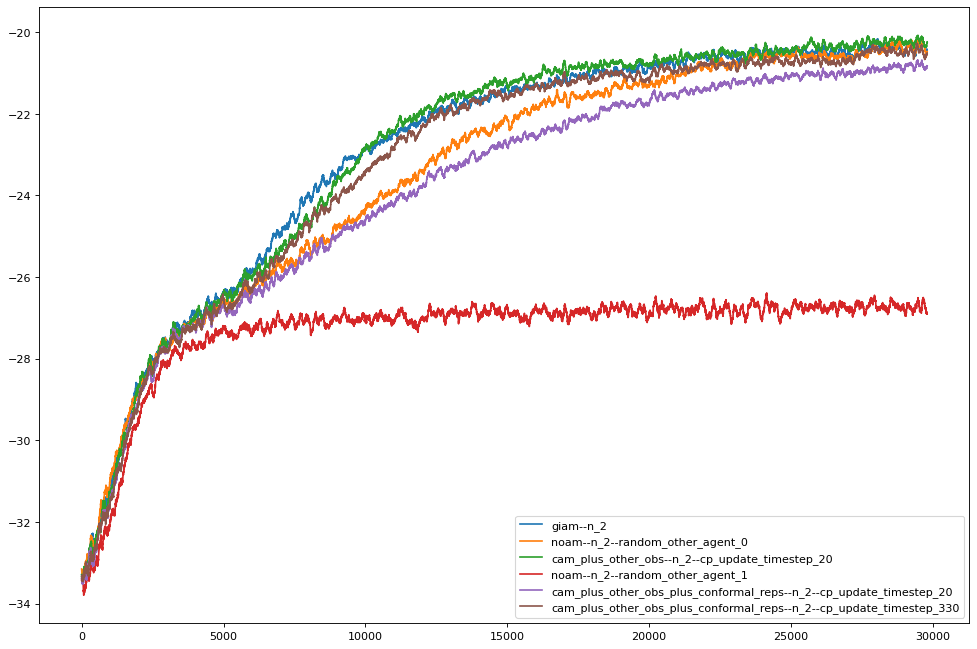

In [14]:
from matplotlib.pyplot import figure



vals = [] 
# lst = [215, 270, 320, 330, 340] 
lst = [330] 
for lim in range(0,1,1): 
    figure(figsize=(15, 10), dpi=80) 
    for e in exps: 
        if "reps" in e: 
            if int(e.split('_')[-1]) in lst: 
#             if (int(e.split('_')[-1]) == 1000) \
#             or (int(e.split('_')[-1]) == 300):
#             if (int(e.split('_')[-1]) >= lim) and (int(e.split('_')[-1]) <= lim+25): 
                print("exp:", e) 
                vals = [] 
                for l in logs: 
                    if e in l: 
                        print("log:", l) 
                        x = np.load(l) 
                        if (x.shape[0]>=CUT): 
                            vals.append(x[:CUT]) 
                vals = np.array(vals)
                print(vals.shape)
                val_means = smooth(np.mean(vals, axis=0), SMOOTH)[SMOOTH:-SMOOTH]
                val_stds = smooth(np.std(vals, axis=0), SMOOTH)[SMOOTH:-SMOOTH]
                plt.plot(val_means, label = e )
        if "cp-reps-3" in l: 
            if int(e.split('_')[-1]) == 300: 
                print("exp:", e) 
                vals = [] 
                for l in logs: 
                    if e in l: 
                        print("log:", l) 
                        x = np.load(l) 
                        if (x.shape[0]>=CUT): 
                            vals.append(x[:CUT]) 
                vals = np.array(vals)
                print(vals.shape)
                val_means = smooth(np.mean(vals, axis=0), SMOOTH)[SMOOTH:-SMOOTH]
                val_stds = smooth(np.std(vals, axis=0), SMOOTH)[SMOOTH:-SMOOTH]
                plt.plot(val_means, label = e )
        if "cam_plus_other_obs" in e: 
            if int(e.split('_')[-1]) == 20: 
                print("exp:", e) 
                vals = [] 
                for l in logs: 
                    if e in l: 
                        print("log:", l) 
                        x = np.load(l) 
                        if (x.shape[0]>=CUT): 
                            vals.append(x[:CUT]) 
                vals = np.array(vals)
                print(vals.shape)
                val_means = smooth(np.mean(vals, axis=0), SMOOTH)[SMOOTH:-SMOOTH]
                val_stds = smooth(np.std(vals, axis=0), SMOOTH)[SMOOTH:-SMOOTH]
                plt.plot(val_means, label = e )
            
        else: 
            print("exp:", e) 
            vals = [] 
            for l in logs: 
                if e in l: 
                    print("log:", l) 
                    x = np.load(l) 
                    if (x.shape[0]>=CUT): 
                        vals.append(x[:CUT]) 
            vals = np.array(vals)
            print(vals.shape)
            val_means = smooth(np.mean(vals, axis=0), SMOOTH)[SMOOTH:-SMOOTH]
            val_stds = smooth(np.std(vals, axis=0), SMOOTH)[SMOOTH:-SMOOTH]
            plt.plot(val_means, label = e )
    plt.legend() 
    plt.show() 
    plt.close() 

In [ ]:
exps 

In [ ]:
# logs = [] 
# [logs.extend(glob.glob(os.path.join(log_dir, "*/**/*.npy"), recursive=True)) for log_dir in LOG_DIRS] 

# exps = set() 
# [exps.add("--".join(l.split("/")[-3].split("--")[:-1])) for l in logs] 
# print(exps) 

# envs = set()
# [envs.add(e.split("--")[1]) for e in exps]
# print(envs) 

# from matplotlib.pyplot import figure


# vals = [] 
# for env in envs: 
#     figure(figsize=(15, 10), dpi=80) 
#     for e in exps: 
#         if env in e: 
#             print("exp:", e) 
#             vals = [] 
#             for l in logs: 
#                 if e in l: 
#                     x = np.load(l) 
#                     if (x.shape[0]>CUT): 
#                         vals.append(x[:CUT]) 
#             vals = np.array(vals)
#             print(vals.shape)
#             val_means = smooth(np.mean(vals, axis=0), SMOOTH)[SMOOTH:-SMOOTH]
#             val_stds = smooth(np.std(vals, axis=0), SMOOTH)[SMOOTH:-SMOOTH]
#             plt.plot(val_means, label = e )
#     plt.legend() 
#     plt.show() 
#     plt.close() 
